# TAREA: MUESTREO Y ESTIMACIÓN DE DISTRIBUCIONES

Se tiene una base de datos de 10,000 habitantes, de edad entre [0 y 90] y se tiene que hacer lo siguiente: 

1. Comparar la función de probabilidad original (FDP) con dos muestras aleatoras de tamaño k= 100 y k = 1000.
1. Repetir 100 veces lo siguiente y guardar en lista EX:
* Escoger una muestra de forma aleatoria de tamaño N = 100
* De N(100), escoger el valor más pequeño, más grande y valor esperado E(100).
* Agregar E(100) a una lista.
3. Graficar distribución de EX.
4. Comparar la distribución de EX con FDP.



In [4]:
import pandas as pd
from google.colab import files

files.upload()

Saving dis.csv to dis.csv
Saving eda.csv to eda.csv


{'dis.csv': b'0 0.0017\r\n1 0.0007\r\n2 0.0008\r\n3 0.0012\r\n4 0.0011\r\n5 0.0021\r\n6 0.0024\r\n7 0.0025\r\n8 0.0032\r\n9 0.0032\r\n10 0.0043\r\n11 0.004\r\n12 0.0045\r\n13 0.0056\r\n14 0.0054\r\n15 0.0072\r\n16 0.0069\r\n17 0.0072\r\n18 0.0113\r\n19 0.0096\r\n20 0.0123\r\n21 0.0121\r\n22 0.0153\r\n23 0.0127\r\n24 0.0157\r\n25 0.0161\r\n26 0.0164\r\n27 0.0199\r\n28 0.0209\r\n29 0.0195\r\n30 0.0223\r\n31 0.0223\r\n32 0.0222\r\n33 0.0236\r\n34 0.0234\r\n35 0.028\r\n36 0.0259\r\n37 0.0247\r\n38 0.0293\r\n39 0.0277\r\n40 0.0259\r\n41 0.0253\r\n42 0.0241\r\n43 0.0273\r\n44 0.0245\r\n45 0.0268\r\n46 0.0237\r\n47 0.0215\r\n48 0.0228\r\n49 0.0242\r\n50 0.0226\r\n51 0.0191\r\n52 0.0197\r\n53 0.0159\r\n54 0.0178\r\n55 0.0163\r\n56 0.0143\r\n57 0.0175\r\n58 0.0139\r\n59 0.0119\r\n60 0.0115\r\n61 0.0092\r\n62 0.007\r\n63 0.0075\r\n64 0.0061\r\n65 0.006\r\n66 0.0057\r\n67 0.0051\r\n68 0.004\r\n69 0.0032\r\n70 0.0036\r\n71 0.0037\r\n72 0.0018\r\n73 0.0026\r\n74 0.0024\r\n75 0.0017\r\n76 0.0013\r\n

In [5]:
df = pd.read_csv("dis.csv",delimiter=' ')
df.drop(columns=["0"])
df2 = pd.read_csv("eda.csv")

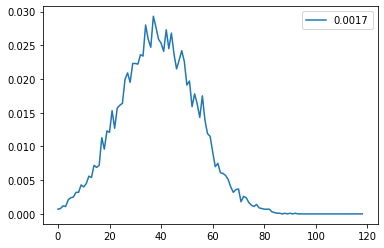

In [6]:
df_dist = df.drop(columns=["0"])
df_dist.plot()

,32
count,9999.000000
mean,39.846085
std,14.753242
min,0.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,93.000000


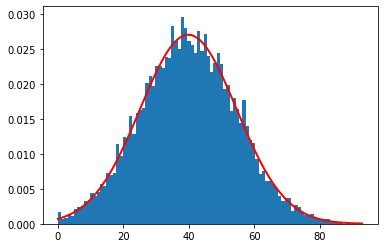

In [7]:
import matplotlib.pyplot as plt # importando matplotlib

import numpy as np

df2_numpy = df2.to_numpy()

mu = df2_numpy.mean()
sigma = df2_numpy.std()

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(df2_numpy,max(df2_numpy)[0]+1, density = True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

df2.describe()

In [34]:
def random_df2(cantidad_muestra):
  random_indices = np.random.choice(9999,cantidad_muestra)
  random_filas = df2_numpy[random_indices,:]

  mu = random_filas.mean()
  sigma = random_filas.std()

  # histograma de distribución normal.
  cuenta, cajas, z = plt.hist(random_filas, max(df2_numpy)[0]+1, density = True)
  # cuenta, cajas, z = plt.hist(random_filas, 50, density = True)
  curva =  1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (cajas - mu)**2 / (2 * sigma**2) )
  plt.plot(cajas, curva,linewidth=2, color='r')
  return cajas, curva, random_filas

Mínimo:  0 Máximo:  85 	Promedio:  39.692


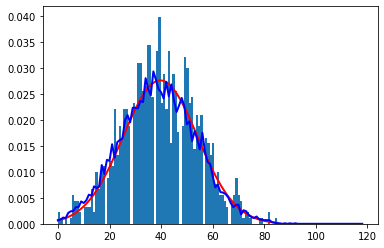

In [35]:
x, y, z= random_df2(1000)
min_z = min(z)
max_z = max(z)
mean_z = z.mean()
plt.plot(df_dist.to_numpy(), linewidth = 2, color = 'b')
print("Mínimo: ",min_z[0], "Máximo: ", max_z[0], "\tPromedio: ", mean_z)

Mínimo:  3 Máximo:  76 	Promedio:  37.78


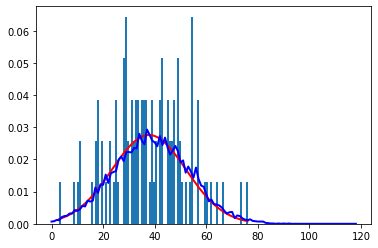

In [37]:
x, y, z= random_df2(100)
min_z = min(z)
max_z = max(z)
mean_z = z.mean()
plt.plot(df_dist.to_numpy(), linewidth = 2, color = 'b')
print("Mínimo: ",min_z[0], "Máximo: ", max_z[0], "\tPromedio: ", mean_z)

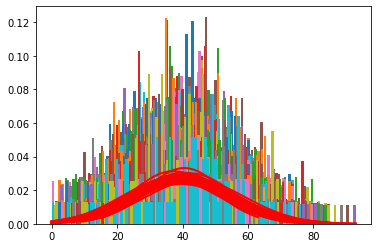

In [28]:
listdist = []
listmin = []
listmax = []
listmean = []
listx = []
x = 0
y = 0
for j in range (0,100):
  x, y, z = random_df2(100)
  listmin.append(min(z)[0])
  listmax.append(max(z)[0])
  listmean.append(z.mean())
  listdist.append(y)
  listx.append(x)


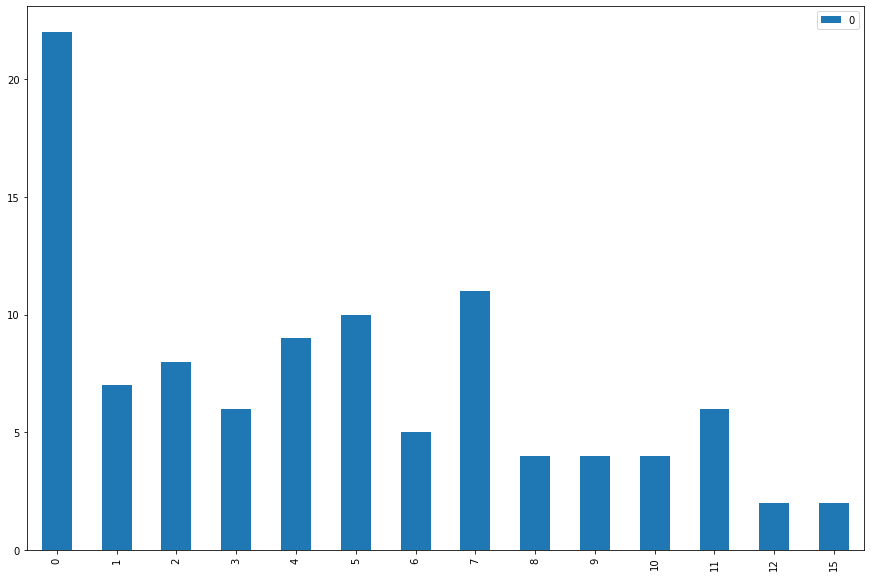

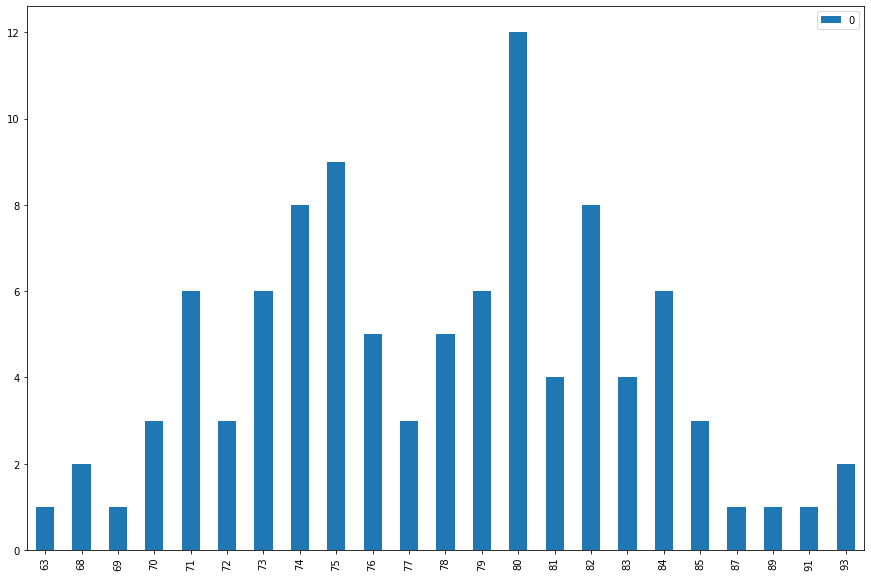

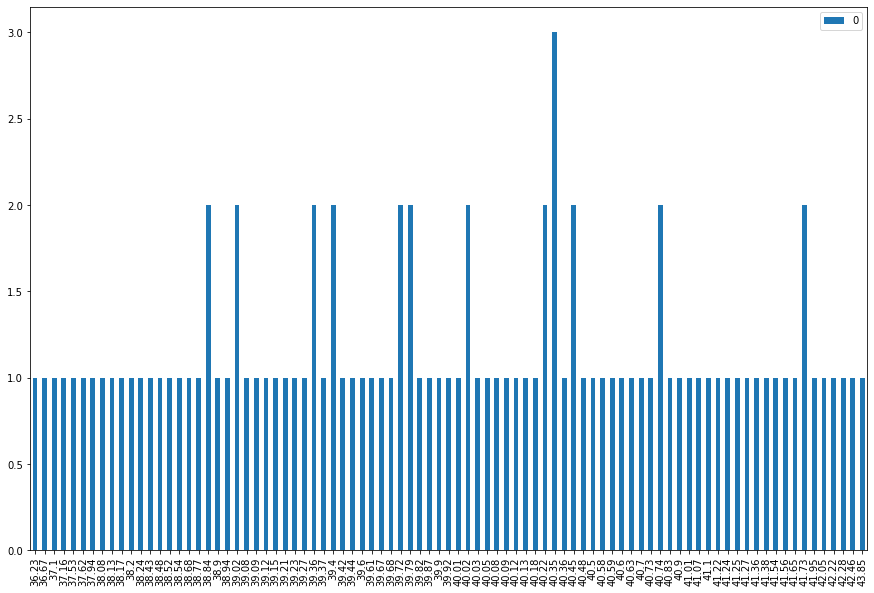

In [29]:
from collections import Counter
def histo_list(lista):
  lista.sort()
  listFrecuencia = Counter(lista)
  df_e = pd.DataFrame.from_dict(listFrecuencia, orient = 'index')
  df_e.plot(kind='bar', figsize=(15,10))

histo_list(listmin)
histo_list(listmax)
histo_list(listmean)

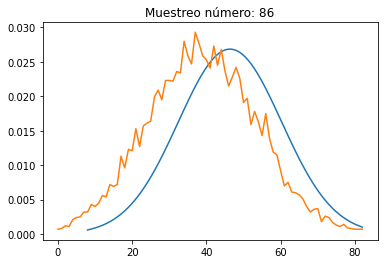

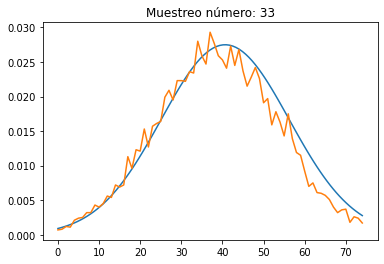

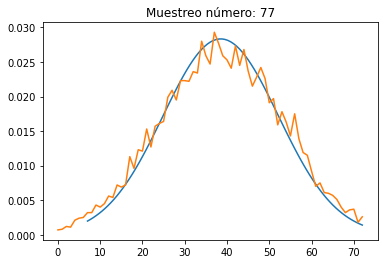

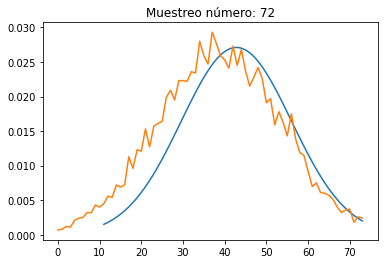

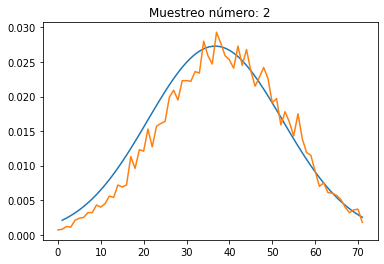

In [45]:
import random
from scipy.spatial import distance
for k in range(0,5):
  aleatorio = random.randrange(0,100)
  newdata = np.squeeze(listdist[aleatorio]) 
  plt.plot(listx[k], newdata) 
  plt.plot(df_dist.to_numpy()[list(range(0,int(max(listx[k])+1))),:])
  plt.title("Muestreo número: %i" %aleatorio)
  plt.show()